# DDIM

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0, Loss: 0.026384970173239708, PSNR: 15.786434173583984
Epoch 50, Loss: 0.014903347939252853, PSNR: 18.267160415649414
Epoch 100, Loss: 0.004752087872475386, PSNR: 23.231155395507812
Epoch 150, Loss: 0.0033946670591831207, PSNR: 24.692028045654297
Epoch 200, Loss: 0.00270151742734015, PSNR: 25.683921813964844
Epoch 250, Loss: 0.002155687427148223, PSNR: 26.664142608642578
Epoch 300, Loss: 0.0017998255789279938, PSNR: 27.447696685791016
Epoch 350, Loss: 0.0015420595882460475, PSNR: 28.118988037109375
Epoch 400, Loss: 0.0013432608684524894, PSNR: 28.71839714050293
Epoch 450, Loss: 0.0011925005819648504, PSNR: 29.23541259765625
Epoch 500, Loss: 0.001075507141649723, PSNR: 29.683866500854492
Epoch 550, Loss: 0.0009882863378152251, PSNR: 30.051172256469727
Epoch 600, Loss: 0.0009286654531024396, PSNR: 30.321407318115234
Epoch 650, Loss: 0.000858040526509285, PSNR: 30.664920806884766
Epoch 700, Loss: 0.000800341775175184, PSNR: 30.96724510192871
Epoch 750, Loss: 0.0007555318879894912, 

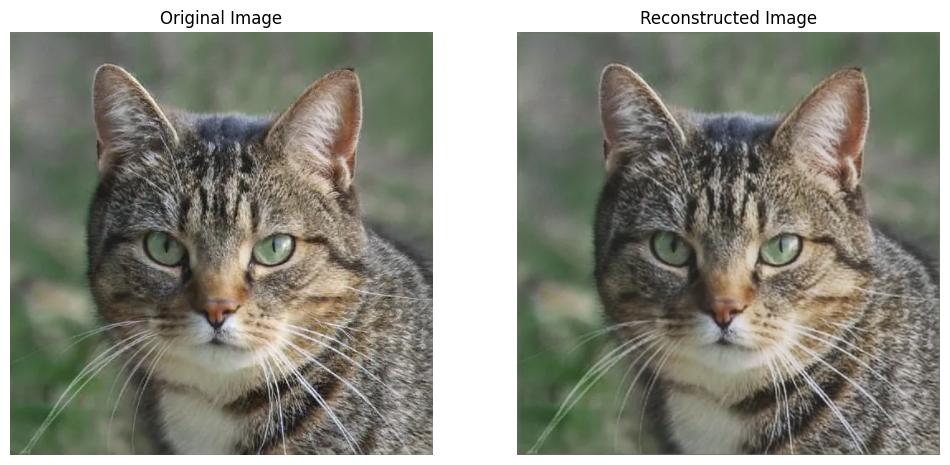

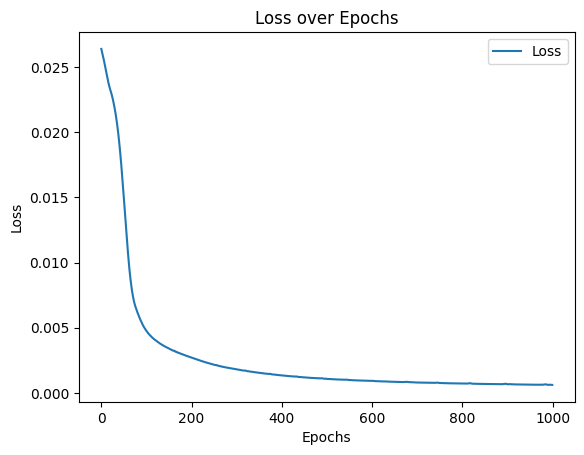

In [4]:
import torch
import torchvision.transforms as transforms
from torch import nn, optim
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np

# Load and preprocess the image
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # Add batch dimension

# Define the model (a simple UNet-like architecture)
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Function to calculate PSNR
def psnr(target, output):
    mse = torch.mean((target - output) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

# Diffusion noise parameter function
def diffusion_noise(t, x_0, noise_level=0.1):
    return x_0 + torch.randn_like(x_0) * noise_level * t

# Training settings
image_path = "./image/image_1.jpg"
model = SimpleUNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
image = load_image(image_path)
epochs = 1000
noise_decay = 0.99  # Noise decay factor per epoch for DIP

losses = []  # List to store loss values

# Training loop
for epoch in tqdm(range(epochs)):
    model.train()
    noise_level = max(0.01, noise_decay ** epoch)  # Exponential decay of noise level
    noisy_image = diffusion_noise(noise_level, image)
    optimizer.zero_grad()
    output = model(noisy_image)
    loss = criterion(output, image)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())  # Store loss value
    
    if epoch % 50 == 0:
        current_psnr = psnr(image, output)
        print(f"Epoch {epoch}, Loss: {loss.item()}, PSNR: {current_psnr}")

# Display and save results
with torch.no_grad():
    model.eval()
    final_output = model(image)  # Evaluate on the original image
    
    # Save the reconstructed image
    reconstructed_image_pil = transforms.ToPILImage()(final_output.squeeze(0))
    reconstructed_image_pil.save("./image/dip.jpg")

    # Plot and save the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(final_output.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.savefig("./image/dip_plot.png")
    plt.show()

# Plot and save the loss graph
plt.figure()
plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.savefig("./image/ddpm_loss.png")
plt.show()

# DIP

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0, Loss: 0.025299469009041786, PSNR: 15.96888542175293
Epoch 50, Loss: 0.015741286799311638, PSNR: 18.029598236083984
Epoch 100, Loss: 0.004901327658444643, PSNR: 23.09686279296875
Epoch 150, Loss: 0.0035384309012442827, PSNR: 24.511892318725586
Epoch 200, Loss: 0.0027584803756326437, PSNR: 25.593299865722656
Epoch 250, Loss: 0.0022540094796568155, PSNR: 26.470441818237305
Epoch 300, Loss: 0.001888520666398108, PSNR: 27.238780975341797
Epoch 350, Loss: 0.0016226628795266151, PSNR: 27.897716522216797
Epoch 400, Loss: 0.0014362592482939363, PSNR: 28.42767333984375
Epoch 450, Loss: 0.0012969793751835823, PSNR: 28.870668411254883
Epoch 500, Loss: 0.0011816952610388398, PSNR: 29.274944305419922
Epoch 550, Loss: 0.0010855934815481305, PSNR: 29.643327713012695
Epoch 600, Loss: 0.00101804721634835, PSNR: 29.922321319580078
Epoch 650, Loss: 0.0009591358830220997, PSNR: 30.181198120117188
Epoch 700, Loss: 0.0009442014270462096, PSNR: 30.249351501464844
Epoch 750, Loss: 0.000867470167577266

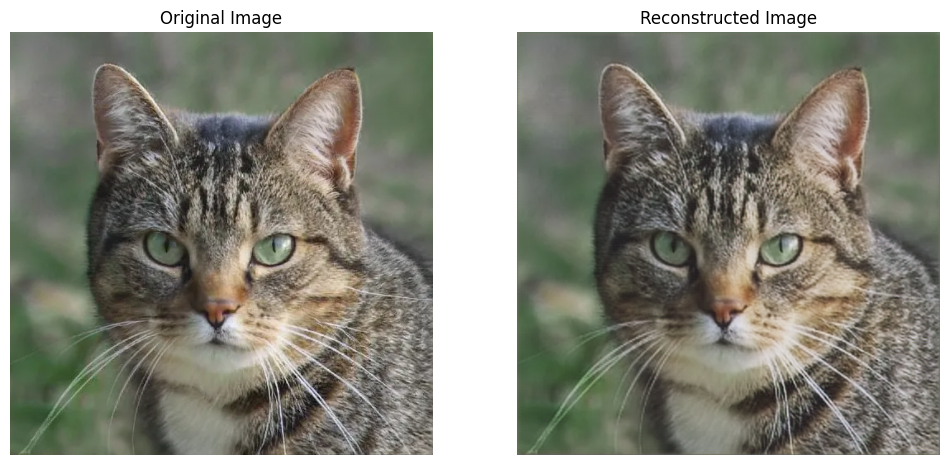

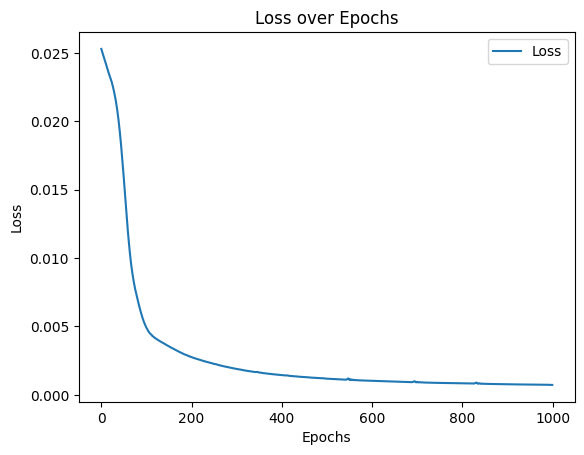

In [5]:
import torch
import torchvision.transforms as transforms
from torch import nn, optim
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np

# Load and preprocess the image
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # Add batch dimension

# Define the model (a simple UNet-like architecture)
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Function to calculate PSNR
def psnr(target, output):
    mse = torch.mean((target - output) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

# Diffusion noise parameter function
def diffusion_noise(t, x_0, noise_level=0.1):
    return x_0 + torch.randn_like(x_0) * noise_level * t

# Training settings
image_path = "./image/image_1.jpg"
model = SimpleUNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
image = load_image(image_path)
epochs = 1000
noise_decay = 0.99  # Noise decay factor per epoch for DIP

losses = []  # List to store loss values

# Training loop
for epoch in tqdm(range(epochs)):
    model.train()
    noise_level = max(0.01, noise_decay ** epoch)  # Exponential decay of noise level
    noisy_image = diffusion_noise(noise_level, image)
    optimizer.zero_grad()
    output = model(noisy_image)
    loss = criterion(output, image)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())  # Store loss value
    
    if epoch % 50 == 0:
        current_psnr = psnr(image, output)
        print(f"Epoch {epoch}, Loss: {loss.item()}, PSNR: {current_psnr}")

# Display and save results
with torch.no_grad():
    model.eval()
    final_output = model(image)  # Evaluate on the original image
    
    # Save the reconstructed image
    reconstructed_image_pil = transforms.ToPILImage()(final_output.squeeze(0))
    reconstructed_image_pil.save("./image/dip.jpg")

    # Plot and save the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(final_output.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.savefig("./image/dip_plot.png")
    plt.show()

# Plot and save the loss graph
plt.figure()
plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.savefig("./image/dip_loss.png")
plt.show()

# DIP-DDIM

DIP Training:   0%|          | 0/300 [00:00<?, ?it/s]

DDPM Training:   0%|          | 0/700 [00:00<?, ?it/s]

Epoch 0, Loss: 0.003907705191522837, PSNR: 24.080781936645508
Epoch 50, Loss: 0.003600692143663764, PSNR: 24.436140060424805
Epoch 100, Loss: 0.003395434468984604, PSNR: 24.69104766845703
Epoch 150, Loss: 0.003224405227228999, PSNR: 24.915504455566406
Epoch 200, Loss: 0.0030950186774134636, PSNR: 25.093366622924805
Epoch 250, Loss: 0.0030176963191479445, PSNR: 25.203245162963867
Epoch 300, Loss: 0.002952414797618985, PSNR: 25.29822540283203
Epoch 350, Loss: 0.002910083159804344, PSNR: 25.360946655273438
Epoch 400, Loss: 0.002887229435145855, PSNR: 25.395185470581055
Epoch 450, Loss: 0.0028665494173765182, PSNR: 25.426406860351562
Epoch 500, Loss: 0.0028546983376145363, PSNR: 25.44439697265625
Epoch 550, Loss: 0.002844268223270774, PSNR: 25.460296630859375
Epoch 600, Loss: 0.0028434169944375753, PSNR: 25.46159553527832
Epoch 650, Loss: 0.002841167850419879, PSNR: 25.465030670166016


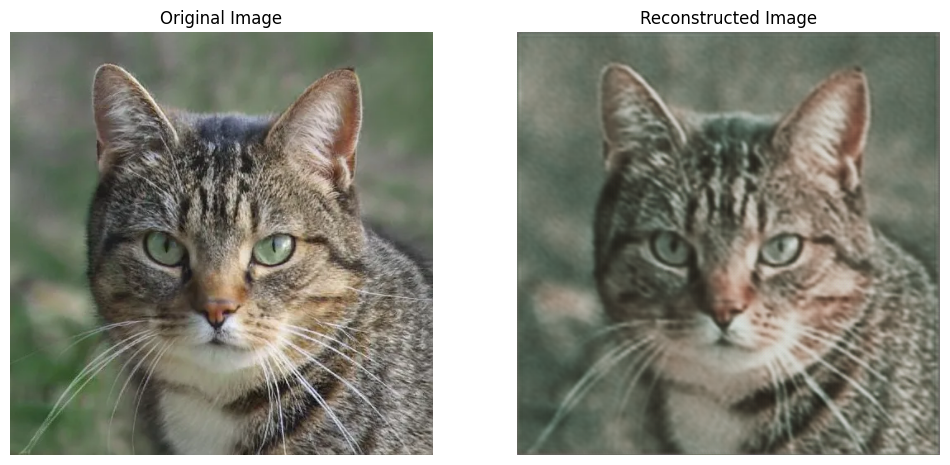

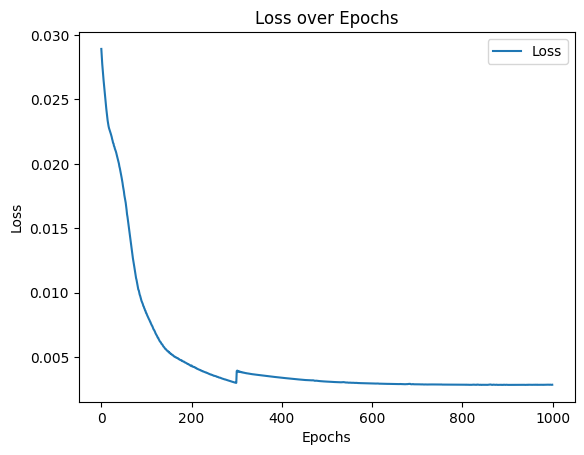

In [6]:
import torch
import torchvision.transforms as transforms
from torch import nn, optim
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Load and preprocess the image
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor()
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)  # Add batch dimension

# Define the UNet-like architecture
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Function to calculate PSNR
def psnr(target, output):
    mse = torch.mean((target - output) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

# Diffusion noise parameter function
def diffusion_noise(t, x_0, noise_level=0.1):
    return x_0 + torch.randn_like(x_0) * noise_level * t

# Training settings
image_path = "./image/image_1.jpg"
model = SimpleUNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
image = load_image(image_path)
dip_epochs = 300  # Short DIP training phase
ddpm_epochs = 700  # Subsequent DDPM training
total_epochs = dip_epochs + ddpm_epochs
noise_decay = 0.99  # Noise decay factor for DIP

losses = []  # List to store loss values

# Initial DIP training to get a prior
for epoch in tqdm(range(dip_epochs), desc="DIP Training"):
    model.train()
    noise_level = max(0.01, noise_decay ** epoch)  # Exponential decay of noise level
    noisy_image = image + torch.randn_like(image) * noise_level
    optimizer.zero_grad()
    output = model(noisy_image)
    loss = criterion(output, image)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())  # Store loss value

# Save the DIP output as initial prior
initial_prior = output.detach()

# DDPM training using the initial prior
for epoch in tqdm(range(ddpm_epochs), desc="DDPM Training"):
    model.train()
    noise_level = (epoch / ddpm_epochs) * 0.5  # Gradually increase noise level
    noisy_image = diffusion_noise(noise_level, initial_prior)
    optimizer.zero_grad()
    output = model(noisy_image)
    loss = criterion(output, image)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())  # Store loss value
    
    if epoch % 50 == 0:
        current_psnr = psnr(image, output)
        print(f"Epoch {epoch}, Loss: {loss.item()}, PSNR: {current_psnr}")

# Display and save results
with torch.no_grad():
    model.eval()
    final_output = model(initial_prior)  # Evaluate on the initial prior
    
    # Save the reconstructed image
    reconstructed_image_pil = transforms.ToPILImage()(final_output.squeeze(0))
    reconstructed_image_pil.save("./image/dip_ddpm.jpg")

    # Plot and save the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Image")
    plt.imshow(final_output.squeeze(0).permute(1, 2, 0))
    plt.axis('off')
    plt.savefig("./image/dip_ddpm_plot.png")
    plt.show()

# Plot and save the loss graph
plt.figure()
plt.plot(range(total_epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.savefig("./image/dip_ddpm_loss.png")
plt.show()